##  Load dataset

In [1]:
# Importing libraries.
import pandas as pd
import matplotlib.pyplot as plt

# Loading data.
df = pd.read_csv('titanic-passengers.csv', sep=';', encoding="ISO-8859-1")

# Showing head - first five records.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


## Processing dataset

In [2]:

# Cleaning data - Preprocess missing values.
clean_df = df.copy()
clean_df = clean_df.dropna(subset=['Embarked'])
clean_df['Age'].fillna(clean_df['Age'].mean(), inplace=True) 
clean_df['Cabin'].fillna('G6', inplace=True)

In [3]:
# Cleaning data - Feature transformation for categoricals features.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
clean_df['Survived'] = encoder.fit_transform(clean_df['Survived'])
clean_df['Sex'] = encoder.fit_transform(clean_df['Sex'])
clean_df['Embarked'] = encoder.fit_transform(clean_df['Embarked'])
clean_df['Cabin'] = encoder.fit_transform(clean_df['Cabin'])

In [4]:
# Creating a new feature 'FamilySize'. 
last_df = clean_df.copy()
last_df['FamilySize'] = clean_df['SibSp'] + clean_df['Parch'] 
last_df = last_df.drop(columns=['SibSp', 'Parch'])

In [5]:
# Creating a new feature 'Title'. 

Title_Dictionary = {
    "Capt":"Officer",
    "Col":"Officer",
    "Major":"Officer",
    "Dr":"Officer",
    "Rev":"Officer",
    "Jonkheer":"Royalty",
    "Don":"Royalty",
    "Sir":"Royalty",
    "Lady":"Royalty",
    "the Countess":"Royalty",
    "Dona":"Royalty",
    "Mme":"Miss",
    "Mlle":"Miss",
    "Miss":"Miss",
    "Ms":"Mrs",
    "Mr":"Mrs",
    "Mrs":"Mrs",
    "Master":"Master",
    }
updated_df = clean_df.copy()
Title = []
for index, row in updated_df.iterrows():
    for k in Title_Dictionary:
        if k+"." in row['Name']:
            Title.append(Title_Dictionary[k])

updated_df['Title'] = Title 
updated_df['Title'] = encoder.fit_transform(updated_df['Title'])
processed_df = updated_df.drop(['Name', 'Ticket', 'PassengerId'], axis=1)
processed_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,2,1,28.0,0,0,13.0000,144,2,2
1,0,3,1,25.0,0,0,7.6500,139,2,2
2,0,3,1,20.0,0,0,7.8542,144,2,2
3,0,3,0,29.0,0,4,21.0750,144,2,2
4,0,1,1,31.0,1,0,52.0000,37,2,2


## Applying decision tree

In [6]:
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Title']

X = processed_df[feature_cols] # Features
y = processed_df.Survived # Target variable

In [7]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [8]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [9]:
#applying tree algorithm

clf = tree.DecisionTreeClassifier()  
clf.fit(X_train, y_train)   #fitting our model
y_pred=clf.predict(X_test)  
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7790262172284644


## Plotting decision tree

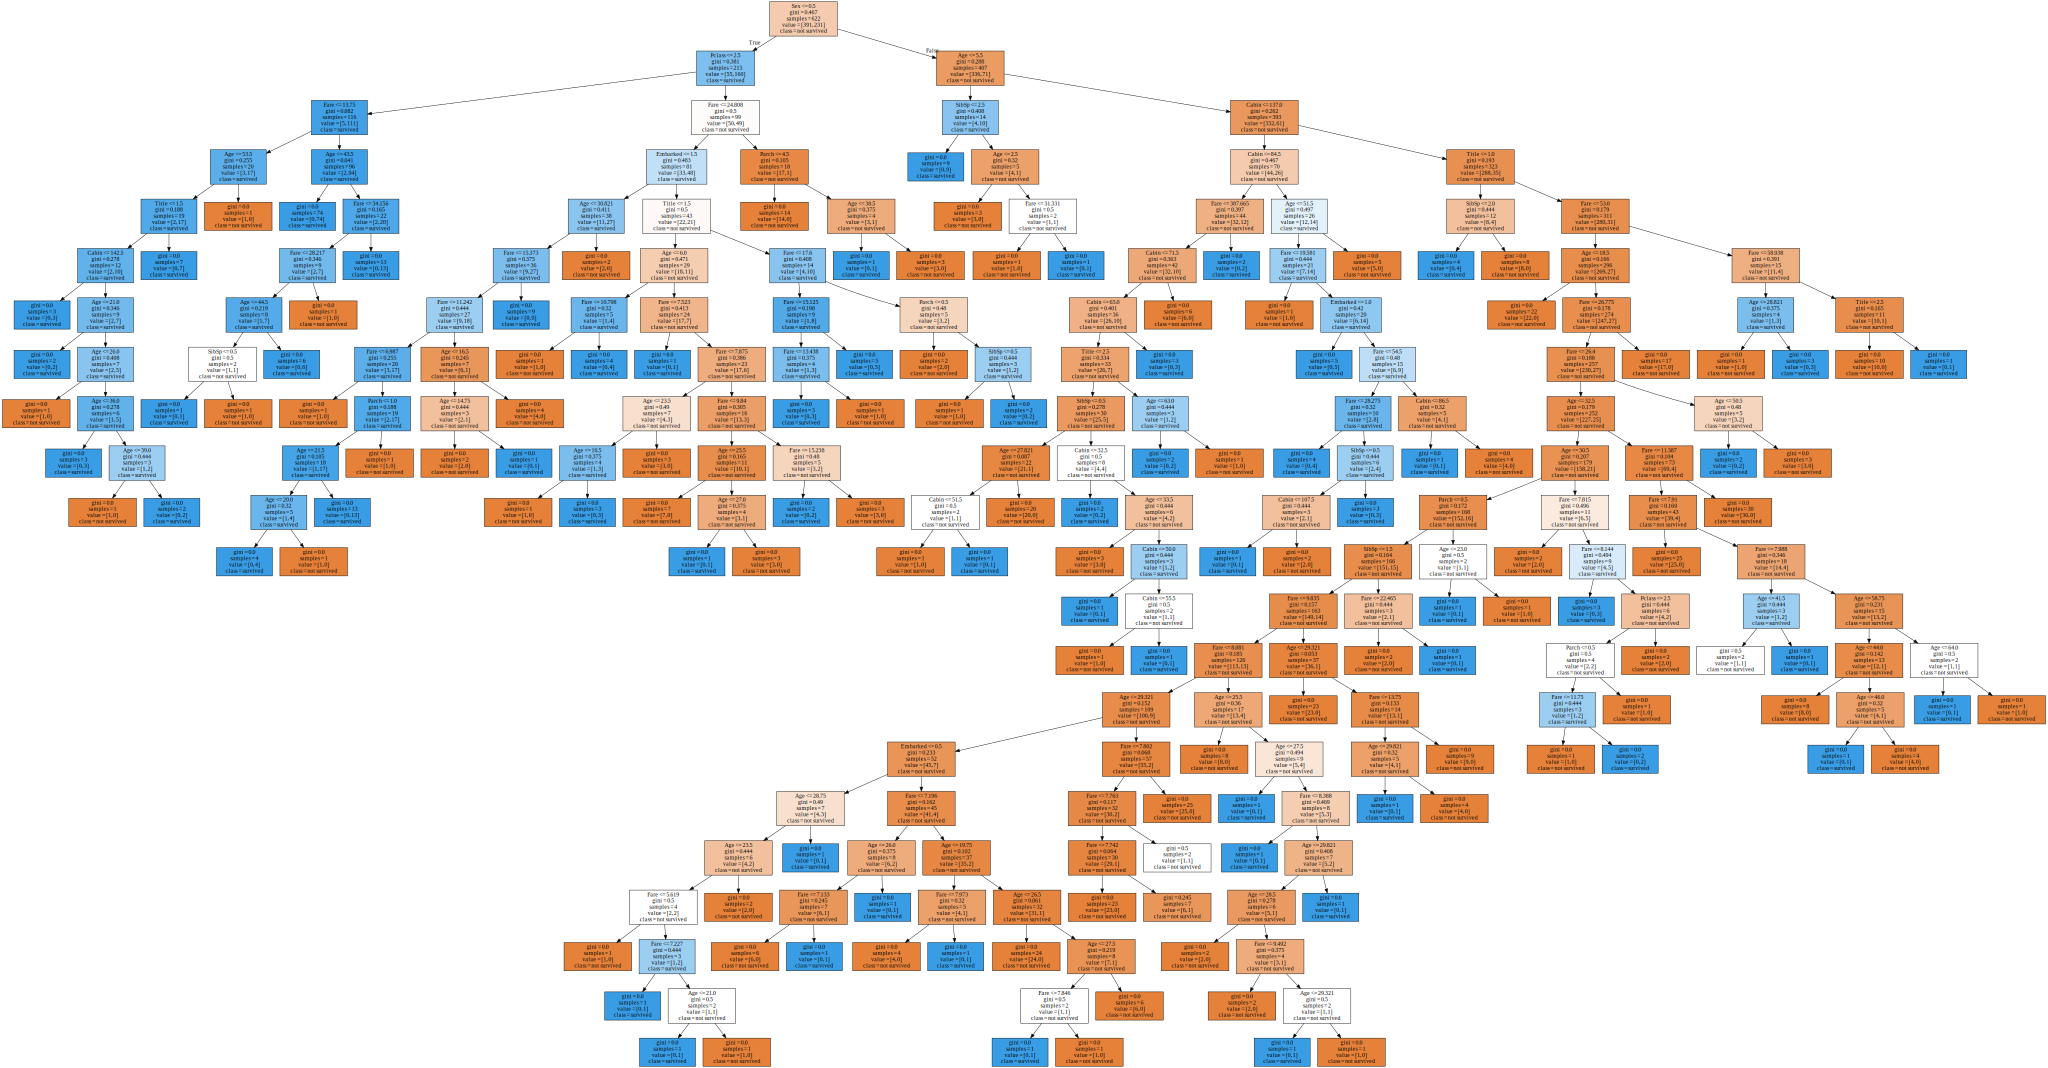

In [10]:
import graphviz

tree_data = tree.export_graphviz(clf, out_file=None,                                 
                                feature_names=feature_cols,
                                class_names=['not survived', 'survived'],
                                filled=True)
                                
graph = graphviz.Source(tree_data, format="png") 
graph.render("decision_tree_graphivz")
'decision_tree_graphivz.png'
graph

## Tuning decision tree parameters

In [11]:
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='random', min_samples_split=4, min_samples_leaf=3,
                                  max_leaf_nodes=11)  
clf.fit(X_train, y_train)   
y_pred=clf.predict(X_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7902621722846442


## Using random forest and calculating accuracy 

In [12]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics

clf_RF=RandomForestClassifier(n_estimators=11)  
clf_RF.fit(X_train, y_train)  
y_pred=clf_RF.predict(X_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8052434456928839


L’algorithme Random forest est plus précis que l’algorithme decision tree amélioré.